# Polynomial Regression(다항 회귀)

### 1. scikit-learn 의 PolynomialFreatures

다항 회귀는 다항변수를 생성한 뒤 LinearRegression 함수에 적용하면 된다.

* 코드실습

캐글의 80가지 시리얼 영양소 평가데이터를 통해 다항 회귀분석을 수행

In [1]:
import pandas as pd
cereal = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv")
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


분석에 필요한 데이터를 추출하기 위해 전처리 진행   
name, mfr, type 변수는 데이터 타입이 object 이므로 분석에서 제외한다.   
설탕함유량 sugars 0이상인 데이터만 추출

In [2]:
cereal = cereal[cereal.columns[3:]] # 기존 데이터프레임에서 앞의 3개 열 제거, 나머지 열 남김
cereal = cereal[cereal.sugars >=0] # sugars 열에 음수 값이 있는 경우 그 행 제외
cereal.head() # 데이터프레임의 상위 5개의 행 출력

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


시리얼의 설탕 함유량(X)에 따른 영양등급평가(y)를 다항 회귀분석으로 예측

C:\Users\dudgh\AppData\Local\Temp\ipykernel_24296\2812098478.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace =True) # 오름차순 정렬


<function matplotlib.pyplot.show(close=None, block=None)>

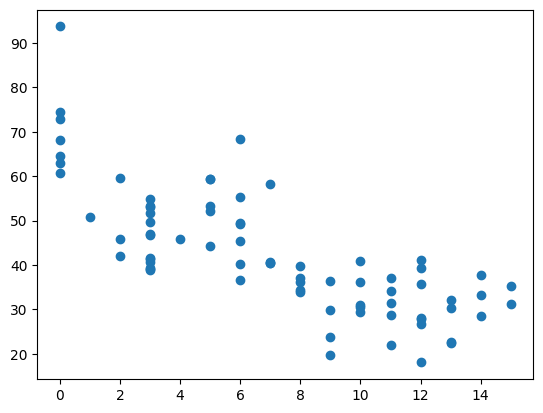

In [3]:
import matplotlib.pyplot as plt

cereal2 = cereal[['sugars', 'rating']] # 'sugars','rating'열만 선택 + careal2프레임 생성
cereal2.sort_values(by=['sugars'], inplace =True) # 오름차순 정렬
cereal2.reset_index(drop=True, inplace =True) # 데이터프레임 인덱스 리셋, 새로운 순차적 인덱스 부여
x=cereal2['sugars'].values # 설탕 함량에 대한 데이터
y=cereal2['rating'].values # 시리얼에 대한 평점 데이터
plt.scatter(x,y) # 설탕 함량(X)와 평점(y) 사이의 관계를 산점도로 표시

plt.show

sugars를 설명변수 X, rating을 타깃변수 y설정   
학습데이터와 평가데이터 7:3 비율로 분할

In [4]:
from sklearn.model_selection import train_test_split

#데이터 테스트용 30%, 데이터 학습용 70% 분할한다
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state =1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


PolynomialFeatures로 2차 다항식 조건을 생성한 뒤 fit_transform()메서드로 X_poly 데이터 생성

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree = 2) # 차수(degree)가 2인 다항 회귀 객체를 생성 (for quadratic features)
X_poly=poly_reg.fit_transform(X_train.reshape(-1,1)) # 학습 데이터(X_train) 다항식 특징으로 변환

from sklearn.linear_model import LinearRegression

reg=LinearRegression() # 선형 회귀 객체 (reg)를 생성
reg.fit(X_poly, y_train) # 변환된 다항식 특징(x_poly)와 y_train을 사용하여 모델 학습

LinearRegression()

다항 회귀 모델을 평가

In [6]:
import numpy as np # 배열 조작을 위해 numpy 불러온다
X_test_poly=poly_reg.transform(X_test.reshape(-1,1)) # 테스트 데이터를 다항식 특징으로 변환
pred=reg.predict(X_test_poly) # 학습된 모델로 출력 예측

np.set_printoptions(precision=2) # 소수점 둘째자리까지 표현
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1)) # 예측값과 실제값을 나란히 출력

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


다양한 성능 평가 지표를 통해 모델의 예측력을 평가

In [7]:
# 필요한 오류 측정 지표 sklearn에서 불러옴
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test, pred) # 실제 값과 예측 값 사이의 평균 제곱 오차 (MSE)계산
mae = mean_absolute_error(y_test, pred) #실제 값과 예측 값 사이의 평균 절대 오차 (MAE)계산
rmse = np.sqrt(mse) # 제곱근 평균 제곱 오차 (RMSE)를 계산
acc = reg.score(poly_reg.transform(X_test.reshape(-1,1)), y_test) # 테스트 데이터에서 모델의 정확도 (R-squared)를 계산

# MSE, MAE, RMSE, 정확도를 소수점 셋째 자리까지 출력
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


다항 회구 분석 결과를 시각화

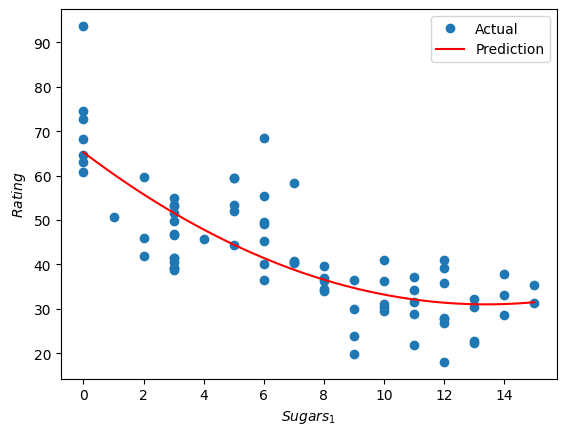

In [8]:
X_new = np.linspace(0,15,100).reshape(100,1) # 0에서 15 사이를 균등하게 나눈 100개의 값을 생성하고, 100x1 배열로 변환
X_new_poly = poly_reg.transform(X_new) # 새로운 값을 다항식 특징으로 변환
y_new = reg.predict(X_new_poly) # 변환된 새로운 값에 대해 예측 값을 계산

# 실제 데이터를 (x,y)를 점('o')으로, 예측값을 빨간색 선 ('r-')으로 그래프에 표시
plt.plot(x,y, 'o', label ='Actual')
plt.plot(X_new, y_new, 'r-', label ='Prediction')

plt.legend(loc='upper right') # 범례를 그래프 오른쪽 위에 추가
plt.xlabel('$Sugars_1$') # x 라벨을 '$Sugars_1$'로 설정 (LaTeX 스타일 형식으로 표현)
plt.ylabel('$Rating$') # y축라벨 '$Rating$'설정

plt.show()

### 4.고차 다항 회귀 분석

* 코드 실습

동일한 시리얼 영양소 평가데이터로 고차 다항 회귀분석을 수행   
설명변수를 12개의 데이터로 설정하여 머신러닝 수행

In [9]:
X = cereal.iloc[:,:-1].values # 마지막 열을 제외한 모든 열에서 특징 값 (x)을 추출
y = cereal.iloc[:,-1].values # 마지막 열에서 목표 값 (y)을 추출

from sklearn.model_selection import train_test_split

# 테스트 데이터 30%, 훈련용 데이터 70%로 분할
# Random_state=1은 동일한 뎅터 분할을 재현할 수 있도록 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 학습 세트와 테스트 세트의 크기를 출력하여 분할이 제대로 되었는지 확인

(53, 12) (23, 12) (53,) (23,)


정확성을 높이기 위해 표준정규화(스케일링) 단계를 추가한 뒤, 다항 변수 변환과 모델 적합 과정을 수행한다.

In [10]:
# [표준화] 'standardScaler'를 사용해 데이터 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# [다항식 변환] 'polynomialFeatures'로 데이터를 2차 다항식으로 변환합니다
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

# [모델학습] 변환된 데이터를 사용해 선형 회귀 모델을 학습시킵니다.
from sklearn.linear_model import LinearRegression
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

회귀분석에서 사용하는 성능평가지표로 고차 다항 회귀의 예측력을 확인

In [11]:
import numpy as np

# [테스트 데이터 변환 및 예측] 학습 시 사용한 다항식 변환을 테스트 데이터에 적용하고, 모델이 예측을 수행합니다.
X_test_poly = poly_reg.transform(X_test)
pred = reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
# 평균 제곱오차
mse = mean_squared_error(y_test, pred)
# 평균 절대 오차
mae = mean_absolute_error(y_test, pred)
# 평균 제곱 오차의 제곱근
rmse = np.sqrt(mse)
# 모델이 예측한 값이 실제 값과 얼마나 일치하는지를 나타내는 지표
acc = reg.score(poly_reg.transform(X_test), y_test)
# 각 평가지표 출력
# 소수점 세번째 자리까지 출력
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))

#ACC는 백분율(%)로 변환하여 출력된다.
print('ACC\t{}%'.format(round(acc *100,3)))

MSE	9.869
MAE	2.162
RMSE	3.142
ACC	92.431%


#### 회귀 모델의 결정 계수가 낮을 때 모델 해석    
결정계수가 낮으면 회귀모델이 데이터에 대해 낮은 연관성을 가지고 있다고 해석한다.   
다만 데이터가 회귀분석에 적합하지 않았을 수도 있으므로, 데이터 탐색을 통해 적절한 분석방법을 고려해야 한다.   
예를 들어, 선형적이지 않은 형태의 데이터의 경우, 비선형 모델을 적용해볼 수 있다.